# Customer segmentation with unsupervised learning

__We will learn by doing__: you should complete with code the places marked with __[WORKSHOP]__

We will be using the following libraries in Python 3:
* jupyter
* pandas
* matplotlib
* scikit-learn

## jupyter
You are already using __jupyter__!

__jupyter is a web-interface IDE__, a development enviroment __with REPL__ where you can execute arbitrary code and see the results instantly. There is a web interface and a server that executed the code. The coding language is usually Python 3, but there are server's kerners for all kind of languages.

Thanks to its REPL _powers_, __jupyter has became the facto standard format__ when showing data analysis, research papers and all data-related presentations. For us developers we could find jupyter as a too-simple IDE, but this simplicity is actually what helps researchers to __easily explore datasets__ and try things out quickly.

### jupyter notebook's cells

__A cell usually contains code or markdown__.

Here you have some ways to move around and execute a cell:
* You can edit any cell just clicking on it with the mouse, or use the keyboard arrows and do _Enter_
* You can unfocus a cell with _Esc_
* You can add a new cell with the key B (bellow) or 
* Executing a cell is simple: _shift+Enter_ or _control+Enter_ will run the code or render the markdown

You can use the mouse and the top menu to do all kind of things, or learn the keyboard shortcuts (in the Help menu).

In [ ]:
# This is a cell with code. Try to execute it: use the mouse to focus it and press control+Enter.

' '.join(['Hello', 'world'])

## pandas

__pandas is a library for manipulating data frames__. It is based in a smaller library, __Numpy__, which operates with matrices. But pandas leverages numpy giving an incredible collection of functions to play with the data.

Let's load ulabox's dataset and play a bit with the data.

In [2]:
# Usually 'pandas' is nicknamed as 'pd'
import pandas as pd
import os.path

filename = 'ulabox_orders_with_categories_partials_2017.csv'
if not os.path.isfile(filename):
    import urllib.request
    urllib.request.urlretrieve('https://raw.githubusercontent.com/ulabox/datasets/master/data/ulabox_orders_with_categories_partials_2017.csv', filename) 

raw_df = pd.read_csv(filename)   

# head() shows first 5 rows
raw_df.head()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,0,1,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,0,2,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,1,3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,1,4,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0


If you have a look at the raw data, __each row has an index__ (left, bold) __with the corresponding column data__. In data analysis rows are usually called "samples" while columns are "features".

Actually in this case __the feature "order" (order number) could be directly used as the index__ of the dataframe. So let's use it and then drop the original "order" column.

In [4]:
df = raw_df.reindex(index=raw_df['order'])
df.drop('order', axis=1, inplace=True)
df.head()

,customer,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
order,,,,,,,,,,,,,
0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,0,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,0,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,1,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,1,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0


__pandas is really powerfull__. For example, it can use multi-indexes.

In [5]:
multi_indexed_df = raw_df.groupby(by=['customer','order']).sum()
multi_indexed_df.head()

total_items  discount%  weekday  hour  Food%  Fresh%  Drinks%  \
customer order                                                                  
0        0               45      23.03        4    13   9.46   87.06     3.48   
         1               38       1.22        5    13  15.87   75.80     6.22   
         2               51      18.08        4    13  16.88   56.75     3.37   
1        3               57      16.51        1    12  28.81   35.99    11.78   
         4               53      18.31        2    11  24.13   60.38     7.78   

                Home%  Beauty%  Health%  Baby%  Pets%  
customer order                                         
0        0       0.00     0.00     0.00    0.0    0.0  
         1       2.12     0.00     0.00    0.0    0.0  
         2      16.48     6.53     0.00    0.0    0.0  
1        3       4.62     2.87    15.92    0.0    0.0  
         4       7.72     0.00     0.00    0.0    0.0

Filtering, sampling and __indexing by sample or a feature__ is really easy in pandas.

In [7]:
sample = df.sample(300, random_state=1)
# I use random_state to get same results (it's the random seed)
sample.head()

,customer,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
order,,,,,,,,,,,,,
10747,3657,45,7.99,1,20,35.44,18.43,23.96,1.00,3.46,0.00,17.72,0.00
12573,4230,55,21.70,2,13,9.60,41.92,16.11,15.74,0.00,0.48,0.00,16.14
29676,10079,1,0.00,1,13,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00
8856,3062,28,4.68,2,13,84.92,0.00,10.55,0.00,4.54,0.00,0.00,0.00
21098,7054,18,8.62,1,8,25.64,19.87,0.00,20.31,34.17,0.00,0.00,0.00


In [8]:
# Getting a column (feature)
sample['total_items'].head()

order
10747    45
12573    55
29676     1
8856     28
21098    18
Name: total_items, dtype: int64

In [9]:
# Getting a row (sample)
sample.loc[12573]

customer       4230.00
total_items      55.00
discount%        21.70
weekday           2.00
hour             13.00
Food%             9.60
Fresh%           41.92
Drinks%          16.11
Home%            15.74
Beauty%           0.00
Health%           0.48
Baby%             0.00
Pets%            16.14
Name: 12573, dtype: float64

In [15]:
# Getting an individual value
sample.loc[12573,'hour']

13

In [16]:
# Filtering with direct test
orders_with_more_than_100_items = sample.loc[sample['total_items'] > 100]
orders_with_more_than_100_items

,customer,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
order,,,,,,,,,,,,,
537,124,141,4.44,6,23,23.00,52.97,15.39,0.00,8.63,0.00,0.00,0.0
19976,6680,102,1.62,1,14,31.15,28.24,14.89,13.35,2.46,0.82,9.09,0.0
16684,5609,222,5.16,7,11,26.73,0.95,35.19,18.89,18.24,0.00,0.00,0.0
10834,3680,109,0.27,2,12,36.11,43.60,18.56,1.73,0.00,0.00,0.00,0.0


In [17]:
# Notice the content of the previous comparison
(sample['total_items'] > 100).head()

order
10747    False
12573    False
29676    False
8856     False
21098    False
Name: total_items, dtype: bool

In [20]:
# [WORKSHOP] Can you find any order with only Drink products bought?


,customer,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
order,,,,,,,,,,,,,
29676,10079,1,0.00,1,13,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
6141,2074,36,0.10,2,17,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
7397,2484,6,3.07,4,12,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
12361,4159,16,3.00,2,9,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
13945,4703,9,0.40,4,12,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
1373,391,6,10.16,2,7,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
2164,657,29,0.00,1,10,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
22432,7465,9,7.56,1,10,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0


__pandas also have several functions for doing statistics__, helpfull when exploring the data.

In [18]:
df.describe()

,customer,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,5012.483367,31.739933,8.455495,3.642367,15.034667,23.560406,20.227279,23.349235,13.539575,5.892949,1.132959,11.096145,1.043087
std,2888.646245,20.576579,14.199350,2.122031,5.717052,21.719824,23.661767,22.523335,17.850282,13.996518,5.307620,24.740364,6.195390
min,0.000000,1.000000,-65.150000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2541.750000,18.000000,1.177500,2.000000,11.000000,7.220000,0.000000,6.710000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5043.000000,29.000000,4.160000,3.000000,15.000000,19.650000,10.930000,17.890000,7.210000,0.000000,0.000000,0.000000,0.000000
75%,7483.000000,41.000000,9.990000,5.000000,20.000000,33.260000,35.790000,33.162500,20.002500,6.512500,0.000000,4.172500,0.000000
max,10238.000000,298.000000,100.000000,7.000000,23.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


As you can see, we get the mean, min, max and other statistics for each feature.

Wait a moment! It seems the maximum _discount%_ is 100%, and the minimum _discount%_ is -65%!! __This looks weird...__

If you want to have a look at other pandas features, I recommend [its documentation](https://pandas.pydata.org/pandas-docs/stable/) and [this cheatsheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf).

## matplotlib
__matplotlib is a library for graphs__. It can use numpy arrays and pandas dataframes as input.

For instance, let's explore the discount% feature using a histogram.

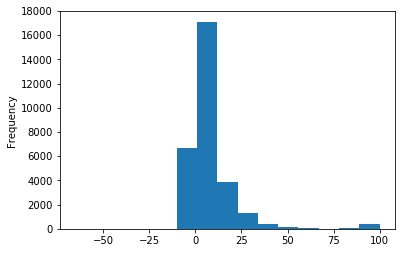

In [23]:
import matplotlib.pyplot as plt

# This is a jupyter helper, so when a matplotlib is evaluated, it shows the graph
%matplotlib inline

# Use 15 blocks(bins)
df['discount%'].plot.hist(bins=15)

After seeing the discount% feature displayed, it's clear that if the discount% is 100%, it should be some kind of free order (like a gift for a VIP). On the other hand, why arethere some negative discount% values? This is not easy to understand until you ask the data provider: some drinks have a surcharge (a negative discount) due to a law that taxes drinks with added sugar.

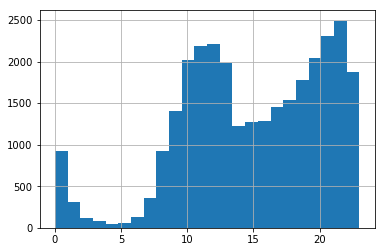

In [24]:
# [WORKSHOP] Plot a histogram to display the most common hours of the day orders are purchased.


If you want to learn more about matplotlib, check [pandas visualization documentation](https://pandas.pydata.org/pandas-docs/stable/visualization.html) and [matplotlib documentation](https://matplotlib.org/contents.html).

## scikit-learn

__scikit-learn is a library with machine learning algorithms__ and helpers.

### KMeans clustering

In [40]:
# Let's use only the 8 categories' partials
X = sample[['Food%', 'Fresh%','Drinks%','Beauty%', 'Health%', 'Baby%', 'Pets%']].divide(100)
X.head()

,Food%,Fresh%,Drinks%,Beauty%,Health%,Baby%,Pets%
order,,,,,,,
10747,0.3544,0.1843,0.2396,0.0346,0.0000,0.1772,0.0000
12573,0.0960,0.4192,0.1611,0.0000,0.0048,0.0000,0.1614
29676,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
8856,0.8492,0.0000,0.1055,0.0454,0.0000,0.0000,0.0000
21098,0.2564,0.1987,0.0000,0.3417,0.0000,0.0000,0.0000


In [41]:
from sklearn.cluster import KMeans

seven_clusters_alg = KMeans(n_clusters=7)
cluster_labels = seven_clusters_alg.fit_predict(X)
cluster_labels

array([1, 0, 2, 6, 4, 4, 0, 6, 1, 4, 1, 1, 1, 2, 4, 3, 0, 2, 4, 4, 1, 1, 1,
       1, 6, 4, 1, 5, 0, 4, 3, 0, 4, 2, 4, 4, 5, 2, 1, 0, 0, 4, 1, 1, 5, 1,
       1, 0, 6, 4, 1, 0, 0, 2, 4, 0, 1, 4, 3, 1, 0, 1, 0, 2, 4, 1, 4, 3, 2,
       2, 4, 0, 0, 3, 5, 0, 1, 2, 3, 4, 1, 1, 2, 6, 0, 2, 1, 1, 1, 4, 1, 3,
       0, 1, 3, 0, 2, 4, 1, 1, 1, 1, 2, 2, 4, 6, 4, 4, 1, 0, 1, 0, 2, 1, 4,
       4, 3, 0, 4, 1, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 3, 4, 3, 2, 0, 1,
       0, 1, 3, 0, 1, 2, 1, 2, 4, 6, 3, 1, 3, 0, 4, 0, 1, 0, 0, 1, 3, 1, 1,
       1, 2, 0, 4, 1, 4, 4, 2, 1, 1, 4, 4, 4, 4, 4, 3, 3, 0, 1, 1, 0, 3, 5,
       4, 0, 1, 2, 4, 1, 1, 1, 0, 4, 0, 1, 1, 3, 2, 4, 0, 2, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 3, 1, 6, 4, 2, 3, 0, 1, 3, 3, 6, 0, 4, 0, 6, 2, 0, 4,
       6, 1, 0, 4, 6, 2, 1, 0, 0, 0, 4, 1, 0, 1, 6, 3, 3, 2, 1, 2, 4, 3, 2,
       0, 0, 1, 0, 4, 0, 0, 4, 0, 1, 4, 3, 4, 6, 2, 2, 3, 2, 1, 4, 2, 1, 1,
       1, 0, 3, 4, 1, 3, 2, 2, 4, 0, 3, 0, 3, 1, 4, 1, 6, 4, 1, 4, 3, 1, 4,
       3], d

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe688056f98>]], dtype=object)

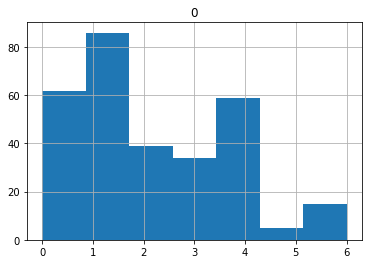

In [42]:
# Convert cluster_labels in a dataframe and plot each cluster
pd.DataFrame(cluster_labels).hist(bins=7)

In [43]:
from sklearn.metrics import silhouette_score

def clusters_quality(X):
    range_n_clusters = range(2,20)

    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters, random_state=1)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

clusters_quality(X)

For n_clusters = 2 The average silhouette_score is : 0.384641393593
For n_clusters = 3 The average silhouette_score is : 0.329525271015
For n_clusters = 4 The average silhouette_score is : 0.324521636035
For n_clusters = 5 The average silhouette_score is : 0.326415085248
For n_clusters = 6 The average silhouette_score is : 0.340217204283
For n_clusters = 7 The average silhouette_score is : 0.343047360559
For n_clusters = 8 The average silhouette_score is : 0.31345219027
For n_clusters = 9 The average silhouette_score is : 0.329264965078
For n_clusters = 10 The average silhouette_score is : 0.325235607771
For n_clusters = 11 The average silhouette_score is : 0.321485740494
For n_clusters = 12 The average silhouette_score is : 0.317743909152
For n_clusters = 13 The average silhouette_score is : 0.320707805179
For n_clusters = 14 The average silhouette_score is : 0.321837010852
For n_clusters = 15 The average silhouette_score is : 0.315950701261
For n_clusters = 16 The average silhouette_

[]

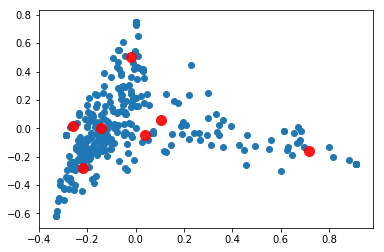

In [45]:
from sklearn.decomposition import PCA

pca_alg = PCA(n_components=2)
bidimensional = pca_alg.fit_transform(X)
data_2 = pd.DataFrame(bidimensional)
plt.scatter(x=data_2[0],y=data_2[1])
centers = pca_alg.transform(seven_clusters_alg.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="red", alpha=0.9, s=100)
plt.plot()